In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the train and test data
train=pd.read_csv("C:\\Users\\hp\\Documents\\DATA SCIENCE\\data_sets\\big mart data\\train_v9rqX0R.csv")
test=pd.read_csv("C:\\Users\hp\\Documents\\DATA SCIENCE\\data_sets\\big mart data\\test_AbJTz2l.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.shape

(5681, 11)

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
#combine the test and train data into one dataset and perform EDA operation
train['source']='train'
test['source']='test'
data=pd.concat([train,test], ignore_index=True) #we concatenate the two files

In [8]:
data.shape

(14204, 13)

In [9]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#we check for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [12]:
#print the unique values in item_fat_content column
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
#print the unique value in outlet establishment year
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [14]:
data.groupby('Outlet_Establishment_Year').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
Outlet_Establishment_Year,,,,,,,,,,,,
1985,2439,0,2439,2439,2439,2439,2439,2439,2439,2439,1463,2439
1987,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553,932,1553
1997,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,930,1550
1998,925,925,925,925,925,925,925,0,925,925,555,925
1999,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,930,1550
2002,1548,1548,1548,1548,1548,1548,1548,0,1548,1548,929,1548
2004,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,930,1550
2007,1543,1543,1543,1543,1543,1543,1543,0,1543,1543,926,1543
2009,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,928,1546


In [15]:
#create a column outlet_age and calculate the outlet_age
data['Outlet_Age']=2020-data['Outlet_Establishment_Year']

In [16]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,11


In [17]:
#print the unique values in outlet_size
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
#print the count value of item fat content
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [19]:
#print the count value of outlet size
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [20]:
#use the mode function to find out the most common value in outlet size
data['Outlet_Size'].mode()[0]

'Medium'

In [21]:
#fill the missing values in Outlet_size with the mode of outlet size column
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [22]:
#fill the missing values in item_weight column with the mean weight
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [23]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,11
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,21
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,22
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,33
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,11
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,33
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,35
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,18
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,13


In [24]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Outlet_Age                      0
dtype: int64

<AxesSubplot:>

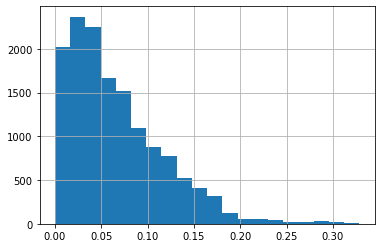

In [25]:
#plot a histogram to reveal the distribution of item visibility column
data['Item_Visibility'].hist(bins=20)

In [26]:
#we discover that there are outliers in the data set. A data point is an outlier if it is greater than 1.5IQR
#above the third quantile or below the first quantile
#lets calculate the first quantile for item_visibility
Q1=data['Item_Visibility'].quantile(0.25)

In [27]:
#we calculate the second quantile
Q3= data['Item_Visibility'].quantile(0.75)

In [28]:
#wr calculate the interquantile range
IQR=Q3-Q1

In [29]:
IQR
#since IQR is known, we remove the outliers from the dataset using a query
#fill_data=data.query('(@Q1-1.5*@IQR) <= Item_Visibility <= (@Q3+1.5*@IQR)')

0.06700157100000001

In [30]:
fill_data=data.query('(@Q1-1.5*@IQR) <= Item_Visibility <= (@Q3+1.5*@IQR)')

In [31]:
#our dataset no longer contain outliers
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,33


In [32]:
fill_data.shape

(13943, 14)

In [33]:
#we assign the fill_data dataset to the orginal data dataframe
data=fill_data

In [34]:
data.shape

(13943, 14)

In [35]:
# we convert the numerical values of Item_Visibility to categories(Low, High, Visible)
data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'],[0.000, 0.065, 0.13, 0.2], labels=['Low_Viz','Viz', 'High_Viz'])

In [36]:
data['Item_Visibility_bins'].value_counts()

Low_Viz     7363
Viz         4283
High_Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [37]:
data['Item_Visibility_bins'].isna().sum()

879

In [38]:
#the Item_visibility_bin contains nan values. we replace it with Low_viz
data['Item_Visibility_bins']=data['Item_Visibility_bins'].fillna('Low_Viz')

In [39]:
data['Item_Visibility_bins'].isna().sum()

0

In [40]:
data['Item_Visibility_bins'].value_counts()

Low_Viz     8242
Viz         4283
High_Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [41]:
#the categories of item fat content were written in different ways. we need to correct this
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [42]:
data['Item_Fat_Content'].value_counts()

Low Fat    9032
Regular    4721
reg         190
Name: Item_Fat_Content, dtype: int64

In [43]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg', 'Regular')

In [44]:
data['Item_Fat_Content'].value_counts()

Low Fat    9032
Regular    4911
Name: Item_Fat_Content, dtype: int64

In [45]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [46]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_bins
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,21,Low_Viz
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,11,Low_Viz
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,21,Low_Viz
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,22,Low_Viz
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,33,Low_Viz
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,11,Low_Viz
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,33,Low_Viz
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,35,Viz
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,18,Low_Viz
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,13,Viz


In [47]:
#code all categorical variables as numeric using LabelEncoder for sklearn.preprocession
#initialize the label encoder
le=LabelEncoder()

In [48]:
#transfor the item_fat_content
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

In [49]:
#transform item_visibility_bins
data['Item_Visibility_bins']=le.fit_transform(data['Item_Visibility_bins'])

In [50]:
#transform outlet_size
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

In [51]:
#transform outlet_location_type
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [52]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [53]:
#create dummies for outlet type
outlet_type_dummy=pd.get_dummies(data['Outlet_Type'])

In [54]:
outlet_type_dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [55]:
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [56]:
#there are many categories embeded in item_identifier, we group them into their individual categories
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
#we map the new column with array categories
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-consumables', 'DR':'Drinks' })

In [57]:
data['Item_Type_Combined'].unique()

array(['Food', 'Drinks', 'Non-consumables'], dtype=object)

In [58]:
data['Item_Type_Combined'].value_counts()

Food               9991
Non-consumables    2652
Drinks             1300
Name: Item_Type_Combined, dtype: int64

In [59]:
#perform a one-hot encoding for all columns by creating a dummy
data=pd.get_dummies(data, columns = ['Item_Type_Combined','Outlet_Type','Item_Fat_Content','Outlet_Size','Outlet_Location_Type' ])

In [60]:
data.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                       float64
Item_Type                              object
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Establishment_Year               int64
Item_Outlet_Sales                     float64
source                                 object
Outlet_Age                              int64
Item_Visibility_bins                    int32
Item_Type_Combined_Drinks               uint8
Item_Type_Combined_Food                 uint8
Item_Type_Combined_Non-consumables      uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1           uint8
Outlet_Type_Supermarket Type2           uint8
Outlet_Type_Supermarket Type3           uint8
Item_Fat_Content_0                      uint8
Item_Fat_Content_1                      uint8
Outlet_Size_0                           uint8
Outlet_Size_1                     

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
#drop the columns that have been converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True )


In [63]:
#divide the dataset into test and train dataset
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [64]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_bins,Item_Type_Combined_Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,FDA15,9.300000,0.016047,249.8092,OUT049,3735.1380,train,21,1,0,...,0,0,1,0,0,1,0,1,0,0
1,DRC01,5.920000,0.019278,48.2692,OUT018,443.4228,train,11,1,1,...,1,0,0,1,0,1,0,0,0,1
2,FDN15,17.500000,0.016760,141.6180,OUT049,2097.2700,train,21,1,0,...,0,0,1,0,0,1,0,1,0,0
3,FDX07,19.200000,0.000000,182.0950,OUT010,732.3800,train,22,1,0,...,0,0,0,1,0,1,0,0,0,1
4,NCD19,8.930000,0.000000,53.8614,OUT013,994.7052,train,33,1,0,...,0,0,1,0,1,0,0,0,0,1
5,FDP36,10.395000,0.000000,51.4008,OUT018,556.6088,train,11,1,0,...,1,0,0,1,0,1,0,0,0,1
6,FDO10,13.650000,0.012741,57.6588,OUT013,343.5528,train,33,1,0,...,0,0,0,1,1,0,0,0,0,1
7,FDP10,12.792854,0.127470,107.7622,OUT027,4022.7636,train,35,2,0,...,0,1,1,0,0,1,0,0,0,1
8,FDH17,16.200000,0.016687,96.9726,OUT045,1076.5986,train,18,1,0,...,0,0,0,1,0,1,0,0,1,0
9,FDU28,19.200000,0.094450,187.8214,OUT017,4710.5350,train,13,2,0,...,0,0,0,1,0,1,0,0,1,0


In [65]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_bins,Item_Type_Combined_Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
8523,FDW58,20.750000,0.007565,107.8622,OUT049,NaN,test,21,1,0,...,0,0,1,0,0,1,0,1,0,0
8524,FDW14,8.300000,0.038428,87.3198,OUT017,NaN,test,13,1,0,...,0,0,0,1,0,1,0,0,1,0
8525,NCN55,14.600000,0.099575,241.7538,OUT010,NaN,test,22,2,0,...,0,0,1,0,0,1,0,0,0,1
8526,FDQ58,7.315000,0.015388,155.0340,OUT017,NaN,test,13,1,0,...,0,0,1,0,0,1,0,0,1,0
8527,FDY38,12.792854,0.118599,234.2300,OUT027,NaN,test,35,2,0,...,0,1,0,1,0,1,0,0,0,1
8528,FDH56,9.800000,0.063817,117.1492,OUT046,NaN,test,23,1,0,...,0,0,0,1,0,0,1,1,0,0
8529,FDL48,19.350000,0.082602,50.1034,OUT018,NaN,test,11,2,0,...,1,0,0,1,0,1,0,0,0,1
8530,FDC48,12.792854,0.015782,81.0592,OUT027,NaN,test,35,1,0,...,0,1,1,0,0,1,0,0,0,1
8531,FDN33,6.305000,0.123365,95.7436,OUT045,NaN,test,18,2,0,...,0,0,0,1,0,1,0,0,1,0
8532,FDA36,5.985000,0.005698,186.8924,OUT017,NaN,test,13,1,0,...,0,0,1,0,0,1,0,0,1,0


In [66]:
test.isna().sum()

Item_Identifier                          0
Item_Weight                              0
Item_Visibility                          0
Item_MRP                                 0
Outlet_Identifier                        0
Item_Outlet_Sales                     5568
source                                   0
Outlet_Age                               0
Item_Visibility_bins                     0
Item_Type_Combined_Drinks                0
Item_Type_Combined_Food                  0
Item_Type_Combined_Non-consumables       0
Outlet_Type_Grocery Store                0
Outlet_Type_Supermarket Type1            0
Outlet_Type_Supermarket Type2            0
Outlet_Type_Supermarket Type3            0
Item_Fat_Content_0                       0
Item_Fat_Content_1                       0
Outlet_Size_0                            0
Outlet_Size_1                            0
Outlet_Size_2                            0
Outlet_Location_Type_0                   0
Outlet_Location_Type_1                   0
Outlet_Loca

In [67]:
train.isna().sum()

Item_Identifier                       0
Item_Weight                           0
Item_Visibility                       0
Item_MRP                              0
Outlet_Identifier                     0
Item_Outlet_Sales                     0
source                                0
Outlet_Age                            0
Item_Visibility_bins                  0
Item_Type_Combined_Drinks             0
Item_Type_Combined_Food               0
Item_Type_Combined_Non-consumables    0
Outlet_Type_Grocery Store             0
Outlet_Type_Supermarket Type1         0
Outlet_Type_Supermarket Type2         0
Outlet_Type_Supermarket Type3         0
Item_Fat_Content_0                    0
Item_Fat_Content_1                    0
Outlet_Size_0                         0
Outlet_Size_1                         0
Outlet_Size_2                         0
Outlet_Location_Type_0                0
Outlet_Location_Type_1                0
Outlet_Location_Type_2                0
dtype: int64

In [69]:
test.drop(['Item_Outlet_Sales','source'], axis=1, inplace=True)

In [70]:
train.drop('source', axis=1, inplace=True)

In [71]:
#export the modified version of these files
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)